In [1]:
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
path = "/Users/balajipavan/Downloads/PDS_Assignment-1/1.1/raw_data/raw_data.csv"
data = pd.read_csv(path)

In [6]:
data.head()

,Height (Inches),Weight (Pounds),Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [7]:
data.isnull().sum()

Height (Inches)    0
Weight (Pounds)    0
Age                0
Grip strength      0
Frailty            0
dtype: int64

In [8]:
#renaming columns
data = data.rename(columns={"Height (Inches)": "Height", "Weight (Pounds)": "Weight"})

In [9]:
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [10]:
#convert Frailty to binary

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder() 

data['Frailty']=l.fit_transform(data['Frailty'])
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [11]:
data.to_csv('/Users/balajipavan/Downloads/PDS_Assignment-1/1.1/clean_data/clean_data.csv')

In [12]:
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1


In [15]:
# Split dataset into independent and dependent variables
A=data.iloc[:,:-1]
B=data.iloc[:,-1]

In [16]:
A

,Height,Weight,Age,Grip strength
0,65.8,112,30,30
1,71.5,136,19,31
2,69.4,153,45,29
3,68.2,142,22,28
4,67.8,144,29,24
5,68.7,123,50,26
6,69.8,141,51,22
7,70.1,136,23,20
8,67.9,112,17,19
9,66.8,120,39,31


In [17]:
B

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: Frailty, dtype: int64

In [24]:
#split train and test
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(
    A, B, test_size=0.2, random_state= 7)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X_train = StandardScaler()

In [29]:
A_train = X_train.fit_transform(A_train)

In [30]:
X_test = StandardScaler()
A_test = X_test.fit_transform(A_test)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [34]:
model.fit(A,B)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
predictions = model.predict(A_test)

/Users/balajipavan/Desktop/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [37]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(A,B)

In [38]:
model.classes_

array([0, 1])

In [44]:
model.score(A,B)

1.0

In [47]:
model.predict(A)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [48]:
model.predict_proba(A)

array([[9.99992228e-01, 7.77234095e-06],
       [9.89416711e-01, 1.05832893e-02],
       [5.20673368e-01, 4.79326632e-01],
       [3.38680800e-01, 6.61319200e-01],
       [2.09102109e-02, 9.79089789e-01],
       [9.99775967e-01, 2.24032875e-04],
       [3.34717425e-01, 6.65282575e-01],
       [9.93988103e-03, 9.90060119e-01],
       [7.81253207e-01, 2.18746793e-01],
       [9.99989509e-01, 1.04910945e-05]])

In [49]:
import matplotlib.pyplot as plt

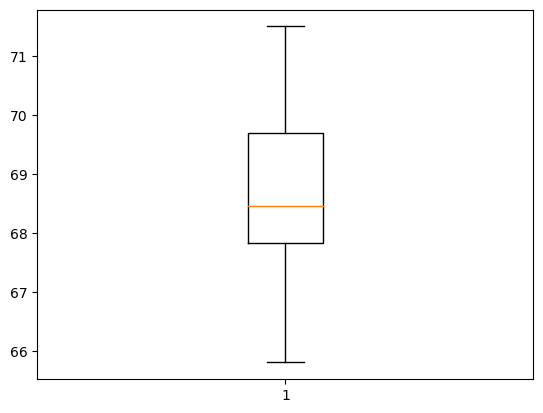

In [52]:
plt.boxplot(data.Height)
plt.savefig('/Users/balajipavan/Downloads/PDS_Assignment-1/1.1/results/Height_distribution.png')